# Propensity Model for PayLater Activation: RevoBank Pilot Program

Advanced Python Assignment - Farhatul Fityah

# Data Collection and Preparation

## Sales Data Preparation

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gdown

import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#Load data sales
url_sales = "https://drive.google.com/file/d/1AFI3jKDmsdqEEYf0Rv51SX7lcnnDpNU0/view?usp=drive_link"
output = "sales_data_ext.pickle"
gdown.download(url_sales, output, quiet=False, fuzzy=True)

sales_data = pd.read_pickle('sales_data_ext.pickle')
sales_data

Downloading...
From: https://drive.google.com/uc?id=1AFI3jKDmsdqEEYf0Rv51SX7lcnnDpNU0
To: /content/sales_data_ext.pickle
100%|██████████| 1.82M/1.82M [00:00<00:00, 167MB/s]


,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,avg_sales_L36M_promo,cnt_sales_L36M_promo,last_sales,month_since_last_sales,count_direct_promo_L12M,client_age
0,100000006,X,A,88,0,25000.0,1,NaN,0,25000.0,26,5,27
1,100000038,X,A,66,0,9000.0,5,10000.0,2,10000.0,25,10,52
2,100000382,X,A,120,1,17330.0,6,16000.0,3,20000.0,18,6,70
3,100000453,X,A,85,1,14000.0,4,14670.0,3,15000.0,24,6,67
4,100000472,X,A,117,0,12500.0,1,12500.0,1,12500.0,23,5,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16482,101059900,Z,E,18,1,15000.0,1,15000.0,1,15000.0,21,3,53
16483,101059915,Z,E,16,0,20000.0,1,NaN,0,20000.0,19,4,71
16484,101059935,Z,E,18,0,20000.0,1,20000.0,1,20000.0,21,4,42
16485,101059941,Z,E,14,0,20000.0,2,20000.0,2,20000.0,17,6,48


In [67]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16487 entries, 0 to 16486
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   account_id               16487 non-null  object 
 1   account_activity_level   16487 non-null  object 
 2   customer_value_level     16487 non-null  object 
 3   MOB                      16487 non-null  int64  
 4   flag_female              16487 non-null  int64  
 5   avg_sales_L36M           15726 non-null  float64
 6   cnt_sales_L36M           16487 non-null  int64  
 7   avg_sales_L36M_promo     12679 non-null  float64
 8   cnt_sales_L36M_promo     16487 non-null  int64  
 9   last_sales               16487 non-null  float64
 10  month_since_last_sales   16487 non-null  int64  
 11  count_direct_promo_L12M  16487 non-null  int64  
 12  client_age               16487 non-null  int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 1.8+ MB


In [68]:
#checking missing value of average sales
sales_data[
    sales_data['avg_sales_L36M'].isna()
]

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,avg_sales_L36M_promo,cnt_sales_L36M_promo,last_sales,month_since_last_sales,count_direct_promo_L12M,client_age
30,100002370,Z,A,107,0,NaN,0,NaN,0,15000.0,56,3,51
34,100002547,X,A,58,0,NaN,0,NaN,0,15000.0,61,3,36
47,100003731,X,A,51,1,NaN,0,NaN,0,15000.0,54,6,69
81,100005474,Z,A,53,0,NaN,0,NaN,0,15000.0,56,2,52
117,100008094,X,B,124,1,NaN,0,NaN,0,15000.0,53,3,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16394,101054957,Z,E,48,1,NaN,0,NaN,0,15000.0,51,3,30
16407,101055421,X,E,51,0,NaN,0,NaN,0,15000.0,52,5,74
16417,101055837,Z,E,48,0,NaN,0,NaN,0,15000.0,51,3,33
16438,101057435,X,E,120,0,NaN,0,NaN,0,15000.0,53,5,66


*Now we know that missing values in average sales because of there was 0 count trx, so we can impute the missing values in `avg_sales_L36M` and `avg_sales_L36M_promo` with 0.*

### Impute Missing Values

In [69]:
#Imputing avg_sales_L36M & avg_sales_L36M_promo missing values with 0 because it was indicate no transaction
sales_data[['avg_sales_L36M', 'avg_sales_L36M_promo']] = (sales_data[['avg_sales_L36M', 'avg_sales_L36M_promo']].fillna(0))
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16487 entries, 0 to 16486
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   account_id               16487 non-null  object 
 1   account_activity_level   16487 non-null  object 
 2   customer_value_level     16487 non-null  object 
 3   MOB                      16487 non-null  int64  
 4   flag_female              16487 non-null  int64  
 5   avg_sales_L36M           16487 non-null  float64
 6   cnt_sales_L36M           16487 non-null  int64  
 7   avg_sales_L36M_promo     16487 non-null  float64
 8   cnt_sales_L36M_promo     16487 non-null  int64  
 9   last_sales               16487 non-null  float64
 10  month_since_last_sales   16487 non-null  int64  
 11  count_direct_promo_L12M  16487 non-null  int64  
 12  client_age               16487 non-null  int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 1.8+ MB


In [70]:
#checking duplicated sales data
sales_data[
    sales_data['account_id'].duplicated()
]

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,avg_sales_L36M_promo,cnt_sales_L36M_promo,last_sales,month_since_last_sales,count_direct_promo_L12M,client_age


*no duplicated data found in sales data*

In [71]:
#Checking value in account_activity_level column
sales_data['account_activity_level'].value_counts()

,count
account_activity_level,
X,11656
Z,3675
Y,1155
XYZ,1


*outlier XYZ found, need to drop*

In [72]:
#Checking value in customer_value_level column
sales_data['customer_value_level'].value_counts()

,count
customer_value_level,
E,5868
B,3071
A,2937
C,2683
D,1927
F,1


*another outlier level F found, our data just have A - E level. We will drop it too!*

### Drop Data with Anomaly Category

In [73]:
# Drop anomaly category
sales_data = sales_data[
    (sales_data['customer_value_level'] != 'F') &
    (sales_data['account_activity_level'] != 'XYZ')
]

#Checking the result
print(sales_data['customer_value_level'].value_counts())
print(sales_data['account_activity_level'].value_counts())
sales_data.info()

customer_value_level
E    5868
B    3071
A    2937
C    2683
D    1926
Name: count, dtype: int64
account_activity_level
X    11656
Z     3675
Y     1154
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 16485 entries, 0 to 16486
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   account_id               16485 non-null  object 
 1   account_activity_level   16485 non-null  object 
 2   customer_value_level     16485 non-null  object 
 3   MOB                      16485 non-null  int64  
 4   flag_female              16485 non-null  int64  
 5   avg_sales_L36M           16485 non-null  float64
 6   cnt_sales_L36M           16485 non-null  int64  
 7   avg_sales_L36M_promo     16485 non-null  float64
 8   cnt_sales_L36M_promo     16485 non-null  int64  
 9   last_sales               16485 non-null  float64
 10  month_since_last_sales   16485 non-null  int64  
 11  count_dire

*Now remaining 16485 rows sales data.*

## XSell Data Preparation

In [74]:
#Load data xsell campaign result
url_xsell = "https://drive.google.com/file/d/1fqsyAe2aqAz76JRNPP9J81mlK8GqbfrL/view?usp=drive_link"
output = "xsell_campaign_result.pickle"
gdown.download(url_xsell, output, quiet=False, fuzzy=True)

xsell_result = pd.read_pickle('xsell_campaign_result.pickle')
xsell_result

Downloading...
From: https://drive.google.com/uc?id=1fqsyAe2aqAz76JRNPP9J81mlK8GqbfrL
To: /content/xsell_campaign_result.pickle
100%|██████████| 594k/594k [00:00<00:00, 90.7MB/s]


,account_id,xsell_success,xsell_sales,xsell_count
0,100000006,0,NaN,0.0
1,100000038,1,10000.0,2.0
2,100000382,0,NaN,0.0
3,100000453,0,NaN,0.0
4,100000472,0,NaN,0.0
...,...,...,...,...
16482,101059900,0,NaN,0.0
16483,101059915,0,NaN,0.0
16484,101059935,0,NaN,0.0
16485,101059941,0,NaN,0.0


In [75]:
#checking duplicated xsell redult data
xsell_result[
    xsell_result['account_id'].duplicated()
]

,account_id,xsell_success,xsell_sales,xsell_count


*no duplicated data found in xsell result data*

In [76]:
xsell_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16487 entries, 0 to 16486
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   account_id     16487 non-null  object 
 1   xsell_success  16487 non-null  int64  
 2   xsell_sales    2946 non-null   float64
 3   xsell_count    16487 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 515.3+ KB


In [77]:
#Imputing xsell_sales missing value with 0 because it was indicate no transaction
xsell_result['xsell_sales'] = xsell_result['xsell_sales'].fillna(0)

#Adjusting xsell count data type into integer for easy counting purpose
xsell_result['xsell_count'] = xsell_result['xsell_count'].astype(int)
xsell_result.info()
xsell_result

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16487 entries, 0 to 16486
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   account_id     16487 non-null  object 
 1   xsell_success  16487 non-null  int64  
 2   xsell_sales    16487 non-null  float64
 3   xsell_count    16487 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 515.3+ KB


,account_id,xsell_success,xsell_sales,xsell_count
0,100000006,0,0.0,0
1,100000038,1,10000.0,2
2,100000382,0,0.0,0
3,100000453,0,0.0,0
4,100000472,0,0.0,0
...,...,...,...,...
16482,101059900,0,0.0,0
16483,101059915,0,0.0,0
16484,101059935,0,0.0,0
16485,101059941,0,0.0,0


# Feature Engineering

In [78]:
sales_data = sales_data.set_index('account_id')

## Creating New Variable

In [79]:
#Creating active last 12 months flag for easy tracking of active customers
sales_data['active_L12M'] = (sales_data['month_since_last_sales'] <= 12).astype(int)
sales_data

,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,avg_sales_L36M_promo,cnt_sales_L36M_promo,last_sales,month_since_last_sales,count_direct_promo_L12M,client_age,active_L12M
account_id,,,,,,,,,,,,,
100000006,X,A,88,0,25000.0,1,0.0,0,25000.0,26,5,27,0
100000038,X,A,66,0,9000.0,5,10000.0,2,10000.0,25,10,52,0
100000382,X,A,120,1,17330.0,6,16000.0,3,20000.0,18,6,70,0
100000453,X,A,85,1,14000.0,4,14670.0,3,15000.0,24,6,67,0
100000472,X,A,117,0,12500.0,1,12500.0,1,12500.0,23,5,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
101059900,Z,E,18,1,15000.0,1,15000.0,1,15000.0,21,3,53,0
101059915,Z,E,16,0,20000.0,1,0.0,0,20000.0,19,4,71,0
101059935,Z,E,18,0,20000.0,1,20000.0,1,20000.0,21,4,42,0


## Encoding Categorical Variables

In [80]:
# This will exclude all numerical columns so we only see the non-numeric one
df_non_numeric = sales_data.select_dtypes(exclude='number')
df_non_numeric

,account_activity_level,customer_value_level
account_id,,
100000006,X,A
100000038,X,A
100000382,X,A
100000453,X,A
100000472,X,A
...,...,...
101059900,Z,E
101059915,Z,E
101059935,Z,E


In [81]:
#Start encoding the non numeric data
pd.get_dummies(df_non_numeric)

,account_activity_level_X,account_activity_level_Y,account_activity_level_Z,customer_value_level_A,customer_value_level_B,customer_value_level_C,customer_value_level_D,customer_value_level_E
account_id,,,,,,,,
100000006,True,False,False,True,False,False,False,False
100000038,True,False,False,True,False,False,False,False
100000382,True,False,False,True,False,False,False,False
100000453,True,False,False,True,False,False,False,False
100000472,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...
101059900,False,False,True,False,False,False,False,True
101059915,False,False,True,False,False,False,False,True
101059935,False,False,True,False,False,False,False,True


In [82]:
# Let's get the columns
non_numerical_column = df_non_numeric.columns
print(non_numerical_column)

# Convert to list
print("\nConvert to list:")
non_numerical_column = list(non_numerical_column)
print(non_numerical_column)

Index(['account_activity_level', 'customer_value_level'], dtype='object')

Convert to list:
['account_activity_level', 'customer_value_level']


In [83]:
sales_data.head()

,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,avg_sales_L36M_promo,cnt_sales_L36M_promo,last_sales,month_since_last_sales,count_direct_promo_L12M,client_age,active_L12M
account_id,,,,,,,,,,,,,
100000006,X,A,88,0,25000.0,1,0.0,0,25000.0,26,5,27,0
100000038,X,A,66,0,9000.0,5,10000.0,2,10000.0,25,10,52,0
100000382,X,A,120,1,17330.0,6,16000.0,3,20000.0,18,6,70,0
100000453,X,A,85,1,14000.0,4,14670.0,3,15000.0,24,6,67,0
100000472,X,A,117,0,12500.0,1,12500.0,1,12500.0,23,5,50,0


In [84]:
pd.get_dummies(sales_data, columns=non_numerical_column, dtype=float, drop_first=False)

,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,avg_sales_L36M_promo,cnt_sales_L36M_promo,last_sales,month_since_last_sales,count_direct_promo_L12M,client_age,active_L12M,account_activity_level_X,account_activity_level_Y,account_activity_level_Z,customer_value_level_A,customer_value_level_B,customer_value_level_C,customer_value_level_D,customer_value_level_E
account_id,,,,,,,,,,,,,,,,,,,
100000006,88,0,25000.0,1,0.0,0,25000.0,26,5,27,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
100000038,66,0,9000.0,5,10000.0,2,10000.0,25,10,52,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
100000382,120,1,17330.0,6,16000.0,3,20000.0,18,6,70,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
100000453,85,1,14000.0,4,14670.0,3,15000.0,24,6,67,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
100000472,117,0,12500.0,1,12500.0,1,12500.0,23,5,50,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101059900,18,1,15000.0,1,15000.0,1,15000.0,21,3,53,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
101059915,16,0,20000.0,1,0.0,0,20000.0,19,4,71,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
101059935,18,0,20000.0,1,20000.0,1,20000.0,21,4,42,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [85]:
#saving encoded data into new dataframe
df_encoded = pd.get_dummies(sales_data, columns=non_numerical_column, dtype=int, drop_first=False)

In [86]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16485 entries, 100000006 to 101060006
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MOB                       16485 non-null  int64  
 1   flag_female               16485 non-null  int64  
 2   avg_sales_L36M            16485 non-null  float64
 3   cnt_sales_L36M            16485 non-null  int64  
 4   avg_sales_L36M_promo      16485 non-null  float64
 5   cnt_sales_L36M_promo      16485 non-null  int64  
 6   last_sales                16485 non-null  float64
 7   month_since_last_sales    16485 non-null  int64  
 8   count_direct_promo_L12M   16485 non-null  int64  
 9   client_age                16485 non-null  int64  
 10  active_L12M               16485 non-null  int64  
 11  account_activity_level_X  16485 non-null  int64  
 12  account_activity_level_Y  16485 non-null  int64  
 13  account_activity_level_Z  16485 non-null  int64  
 14 

# Create Target Variable

In [87]:
#creating new dataframe target variabel
#target = the customer who already activating and using paylater (xsell_success = 1 & xsell_result > 0)

df_target = xsell_result[(xsell_result['xsell_success'] == 1) & (xsell_result['xsell_sales'] > 0)][['account_id']].copy()
df_target['target'] = 1
df_target

,account_id,target
1,100000038,1
5,100000612,1
8,100000862,1
12,100001304,1
15,100001442,1
...,...,...
16462,101058907,1
16463,101058946,1
16473,101059507,1
16476,101059655,1


*There are 2910 data with target 1, else will fill with 0 as customer who never use PayLater.*

# Combine Features & Target Data

In [88]:
# Since it's left join, some account_id is NULL when they never use/activate paylater (look at "target" column)
df_propensity = df_encoded.merge(df_target, how='left', on='account_id')
df_propensity

,account_id,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,avg_sales_L36M_promo,cnt_sales_L36M_promo,last_sales,month_since_last_sales,count_direct_promo_L12M,...,active_L12M,account_activity_level_X,account_activity_level_Y,account_activity_level_Z,customer_value_level_A,customer_value_level_B,customer_value_level_C,customer_value_level_D,customer_value_level_E,target
0,100000006,88,0,25000.0,1,0.0,0,25000.0,26,5,...,0,1,0,0,1,0,0,0,0,NaN
1,100000038,66,0,9000.0,5,10000.0,2,10000.0,25,10,...,0,1,0,0,1,0,0,0,0,1.0
2,100000382,120,1,17330.0,6,16000.0,3,20000.0,18,6,...,0,1,0,0,1,0,0,0,0,NaN
3,100000453,85,1,14000.0,4,14670.0,3,15000.0,24,6,...,0,1,0,0,1,0,0,0,0,NaN
4,100000472,117,0,12500.0,1,12500.0,1,12500.0,23,5,...,0,1,0,0,1,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16480,101059900,18,1,15000.0,1,15000.0,1,15000.0,21,3,...,0,0,0,1,0,0,0,0,1,NaN
16481,101059915,16,0,20000.0,1,0.0,0,20000.0,19,4,...,0,0,0,1,0,0,0,0,1,NaN
16482,101059935,18,0,20000.0,1,20000.0,1,20000.0,21,4,...,0,0,0,1,0,0,0,0,1,NaN
16483,101059941,14,0,20000.0,2,20000.0,2,20000.0,17,6,...,0,0,0,1,0,0,0,0,1,NaN


In [89]:
df_propensity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16485 entries, 0 to 16484
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   account_id                16485 non-null  object 
 1   MOB                       16485 non-null  int64  
 2   flag_female               16485 non-null  int64  
 3   avg_sales_L36M            16485 non-null  float64
 4   cnt_sales_L36M            16485 non-null  int64  
 5   avg_sales_L36M_promo      16485 non-null  float64
 6   cnt_sales_L36M_promo      16485 non-null  int64  
 7   last_sales                16485 non-null  float64
 8   month_since_last_sales    16485 non-null  int64  
 9   count_direct_promo_L12M   16485 non-null  int64  
 10  client_age                16485 non-null  int64  
 11  active_L12M               16485 non-null  int64  
 12  account_activity_level_X  16485 non-null  int64  
 13  account_activity_level_Y  16485 non-null  int64  
 14  accoun

*After merging, the target value of 1 becomes 2909, meaning that there is 1 paylater user customer who is not included in the transaction data (sales).*

In [90]:
#Filling the missing values target with 0
df_propensity['target'] = df_propensity['target'].fillna(0).astype(int)
df_propensity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16485 entries, 0 to 16484
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   account_id                16485 non-null  object 
 1   MOB                       16485 non-null  int64  
 2   flag_female               16485 non-null  int64  
 3   avg_sales_L36M            16485 non-null  float64
 4   cnt_sales_L36M            16485 non-null  int64  
 5   avg_sales_L36M_promo      16485 non-null  float64
 6   cnt_sales_L36M_promo      16485 non-null  int64  
 7   last_sales                16485 non-null  float64
 8   month_since_last_sales    16485 non-null  int64  
 9   count_direct_promo_L12M   16485 non-null  int64  
 10  client_age                16485 non-null  int64  
 11  active_L12M               16485 non-null  int64  
 12  account_activity_level_X  16485 non-null  int64  
 13  account_activity_level_Y  16485 non-null  int64  
 14  accoun

In [91]:
#This is our final data use for Logistic Regression Classification
df_propensity = df_propensity.set_index('account_id')
df_propensity

,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,avg_sales_L36M_promo,cnt_sales_L36M_promo,last_sales,month_since_last_sales,count_direct_promo_L12M,client_age,active_L12M,account_activity_level_X,account_activity_level_Y,account_activity_level_Z,customer_value_level_A,customer_value_level_B,customer_value_level_C,customer_value_level_D,customer_value_level_E,target
account_id,,,,,,,,,,,,,,,,,,,,
100000006,88,0,25000.0,1,0.0,0,25000.0,26,5,27,0,1,0,0,1,0,0,0,0,0
100000038,66,0,9000.0,5,10000.0,2,10000.0,25,10,52,0,1,0,0,1,0,0,0,0,1
100000382,120,1,17330.0,6,16000.0,3,20000.0,18,6,70,0,1,0,0,1,0,0,0,0,0
100000453,85,1,14000.0,4,14670.0,3,15000.0,24,6,67,0,1,0,0,1,0,0,0,0,0
100000472,117,0,12500.0,1,12500.0,1,12500.0,23,5,50,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101059900,18,1,15000.0,1,15000.0,1,15000.0,21,3,53,0,0,0,1,0,0,0,0,1,0
101059915,16,0,20000.0,1,0.0,0,20000.0,19,4,71,0,0,0,1,0,0,0,0,1,0
101059935,18,0,20000.0,1,20000.0,1,20000.0,21,4,42,0,0,0,1,0,0,0,0,1,0


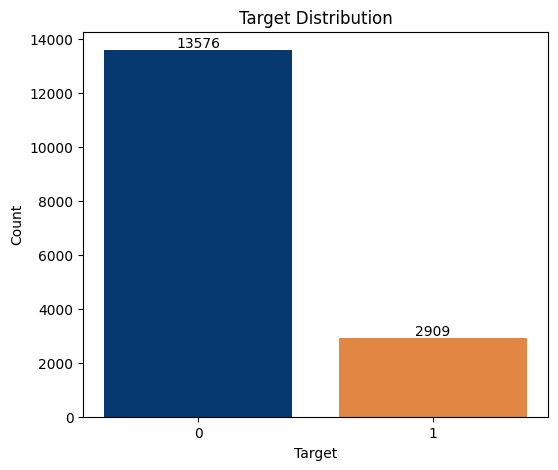

In [92]:
#Checking all target data values distribution
value_counts = df_propensity['target'].value_counts()

#Visualization
plt.figure(figsize=(6,5))
bars = plt.bar(value_counts.index, value_counts.values, color=['#063970', '#e28743'])
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Target Distribution')
plt.xticks(value_counts.index)
plt.bar_label(bars)
plt.show()

# Split Train & Test

In [93]:
target_column = 'target'
features = df_propensity.drop(columns=target_column).copy()
label = df_propensity[target_column].copy()

In [94]:
features.head() #X data

,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,avg_sales_L36M_promo,cnt_sales_L36M_promo,last_sales,month_since_last_sales,count_direct_promo_L12M,client_age,active_L12M,account_activity_level_X,account_activity_level_Y,account_activity_level_Z,customer_value_level_A,customer_value_level_B,customer_value_level_C,customer_value_level_D,customer_value_level_E
account_id,,,,,,,,,,,,,,,,,,,
100000006,88,0,25000.0,1,0.0,0,25000.0,26,5,27,0,1,0,0,1,0,0,0,0
100000038,66,0,9000.0,5,10000.0,2,10000.0,25,10,52,0,1,0,0,1,0,0,0,0
100000382,120,1,17330.0,6,16000.0,3,20000.0,18,6,70,0,1,0,0,1,0,0,0,0
100000453,85,1,14000.0,4,14670.0,3,15000.0,24,6,67,0,1,0,0,1,0,0,0,0
100000472,117,0,12500.0,1,12500.0,1,12500.0,23,5,50,0,1,0,0,1,0,0,0,0


In [95]:
label.head() #target = Y data

,target
account_id,
100000006,0
100000038,1
100000382,0
100000453,0
100000472,0


In [96]:
# We define 0.3 for the test size, so 30% of our data will go to testing set
x_training, x_test, y_training, y_test = train_test_split(features, label, test_size=0.3, random_state=42)

In [97]:
# Check split result
for df in [x_training, x_test, y_training, y_test]:
  print(df.shape)

(11539, 19)
(4946, 19)
(11539,)
(4946,)


# EDA on Traing Data

## Target Balance Check

In [98]:
#Target training data balance check
y_training.value_counts(normalize=True)

,proportion
target,
0,0.824075
1,0.175925


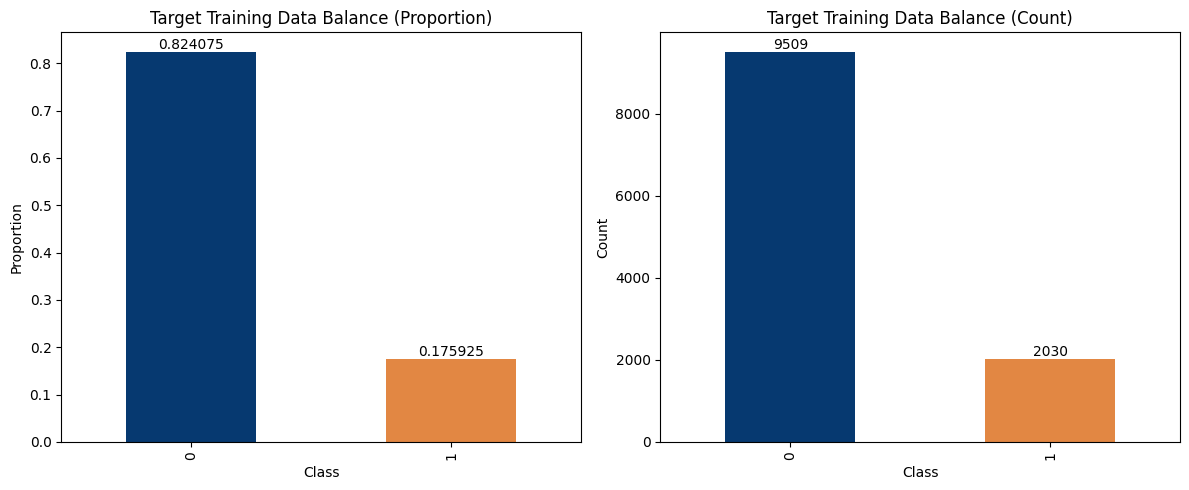

In [99]:
# Visualization of target training data balance checking

fig, axes = plt.subplots(1, 2, figsize=(12,5))

#Proportion Data Distribution Chart
values_prop = y_training.value_counts(normalize=True).plot(
    kind='bar',
    color=['#063970', '#e28743'],
    ax=axes[0]
)
axes[0].bar_label(values_prop.containers[0])
axes[0].set_xlabel("Class")
axes[0].set_ylabel("Proportion")
axes[0].set_title("Target Training Data Balance (Proportion)")

#Count Data Distribution Chart
values_count = y_training.value_counts().plot(
    kind='bar',
    color=['#063970', '#e28743'],
    ax=axes[1]
)
axes[1].bar_label(values_count.containers[0])
axes[1].set_xlabel("Class")
axes[1].set_ylabel("Count")
axes[1].set_title("Target Training Data Balance (Count)")

plt.tight_layout()
plt.show()


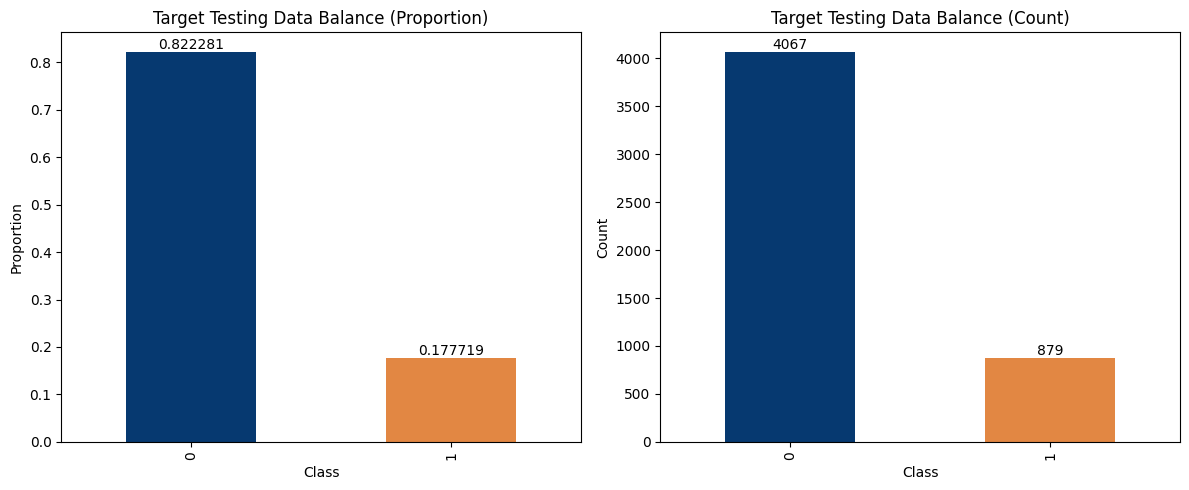

In [100]:
#Target testing data balance check
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Proportion chart
values_prop = y_test.value_counts(normalize=True).plot(
    kind='bar',
    color=['#063970', '#e28743'],
    ax=axes[0]
)
axes[0].bar_label(values_prop.containers[0])
axes[0].set_xlabel("Class")
axes[0].set_ylabel("Proportion")
axes[0].set_title("Target Testing Data Balance (Proportion)")

# Count chart
values_count = y_test.value_counts().plot(
    kind='bar',
    color=['#063970', '#e28743'],
    ax=axes[1]
)
axes[1].bar_label(values_count.containers[0])
axes[1].set_xlabel("Class")
axes[1].set_ylabel("Count")
axes[1].set_title("Target Testing Data Balance (Count)")

plt.tight_layout()
plt.show()


## Feature check using boxplots & heatmaps

In [101]:
#Combine predictors and target.
training = pd.concat([x_training, y_training], axis=1)

In [102]:
# Let's collect all the categorical column in our features first
binary_columns = []
for col in x_training.columns:
  if training[col].nunique() == 2:
    binary_columns.append(col)

binary_columns

['flag_female',
 'active_L12M',
 'account_activity_level_X',
 'account_activity_level_Y',
 'account_activity_level_Z',
 'customer_value_level_A',
 'customer_value_level_B',
 'customer_value_level_C',
 'customer_value_level_D',
 'customer_value_level_E']

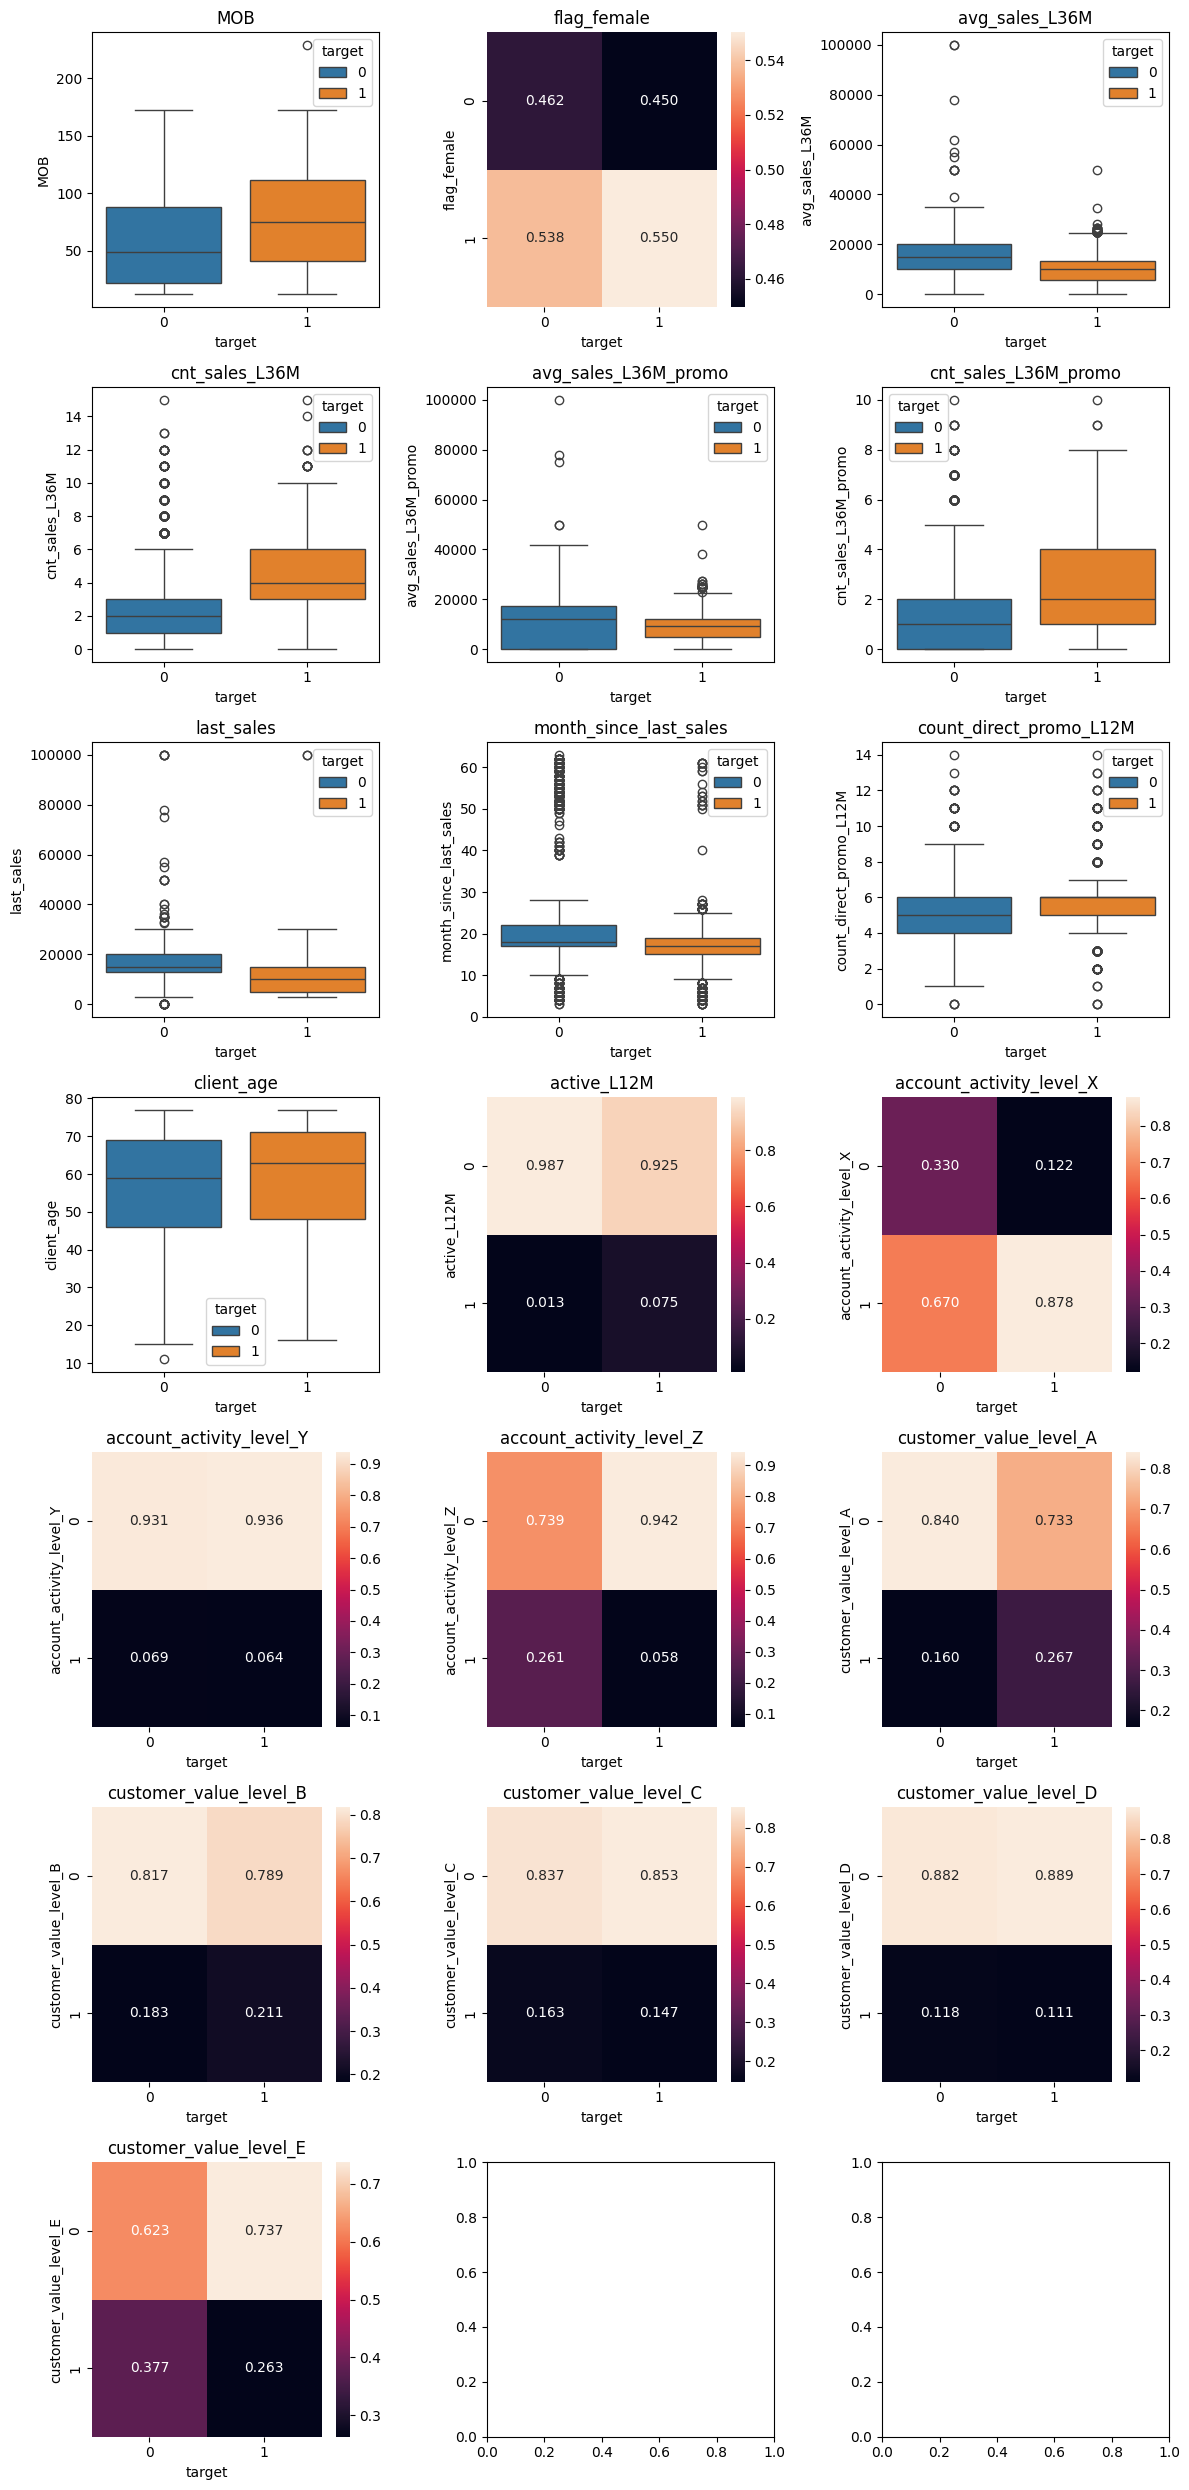

In [103]:
#Boxplot & Heatmap Visualization of each features
fig, ax = plt.subplots(7, 3, figsize = (12, 25))

for index, col in enumerate(x_training.columns):
  ax.flatten()[index].set_title(col)

  if col in binary_columns:
    data = training[['target', col]].groupby('target').value_counts(normalize=True).reset_index()
    data = data.pivot(columns='target', index=col, values='proportion')
    sns.heatmap(data, annot=True, fmt=",.3f", ax=ax.flatten()[index])
  else:
    sns.boxplot(data=training, x='target', y=col, hue='target', ax=ax.flatten()[index])

plt.tight_layout();

## Multicollinearity Check

### Correlation Value Check

In [104]:
#Check correlation of all features
x_training.corr()

,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,avg_sales_L36M_promo,cnt_sales_L36M_promo,last_sales,month_since_last_sales,count_direct_promo_L12M,client_age,active_L12M,account_activity_level_X,account_activity_level_Y,account_activity_level_Z,customer_value_level_A,customer_value_level_B,customer_value_level_C,customer_value_level_D,customer_value_level_E
MOB,1.000000,0.041465,-0.290819,0.269154,-0.247122,0.131523,-0.285811,0.030408,0.207633,0.220771,0.086548,0.528771,-0.008897,-0.570856,-0.037659,-0.023680,-0.000642,-0.003108,0.052008
flag_female,0.041465,1.000000,-0.038593,0.035542,-0.030236,0.020267,-0.046548,-0.013508,-0.012182,-0.048197,-0.019983,0.031853,0.007952,-0.039502,-0.017381,-0.012565,0.000877,0.012475,0.015126
avg_sales_L36M,-0.290819,-0.038593,1.000000,-0.308025,0.555504,-0.223489,0.845178,-0.349532,0.097417,-0.059858,-0.024988,-0.206351,0.001249,0.224114,0.058803,0.030543,-0.017714,0.000989,-0.059048
cnt_sales_L36M,0.269154,0.035542,-0.308025,1.000000,-0.021310,0.829490,-0.456156,-0.335208,0.498496,0.083029,0.079434,0.378734,-0.038615,-0.389454,-0.028083,-0.024303,0.000890,0.004932,0.038303
avg_sales_L36M_promo,-0.247122,-0.030236,0.555504,-0.021310,1.000000,0.225170,0.461571,-0.217120,0.162076,-0.048350,-0.010953,-0.188866,-0.017838,0.216559,0.051615,0.031717,-0.012913,-0.010344,-0.050344
cnt_sales_L36M_promo,0.131523,0.020267,-0.223489,0.829490,0.225170,1.000000,-0.346712,-0.235239,0.406254,0.040888,0.047908,0.212446,-0.036830,-0.209321,0.003910,-0.011312,0.000419,-0.002441,0.007419
last_sales,-0.285811,-0.046548,0.845178,-0.456156,0.461571,-0.346712,1.000000,0.060160,0.001110,-0.082767,-0.034590,-0.207448,0.010864,0.219517,0.059280,0.035097,-0.020170,0.006355,-0.064860
month_since_last_sales,0.030408,-0.013508,-0.349532,-0.335208,-0.217120,-0.235239,0.060160,1.000000,-0.350816,-0.058702,-0.251391,-0.068581,0.000578,0.074386,-0.012703,0.013946,-0.005345,0.013140,-0.005932
count_direct_promo_L12M,0.207633,-0.012182,0.097417,0.498496,0.162076,0.406254,0.001110,-0.350816,1.000000,0.075323,0.242525,0.354007,-0.115521,-0.316180,0.008626,-0.010766,-0.006687,0.009226,0.000827
client_age,0.220771,-0.048197,-0.059858,0.083029,-0.048350,0.040888,-0.082767,-0.058702,0.075323,1.000000,0.066565,0.100443,0.010156,-0.115574,-0.002925,-0.010460,-0.002085,-0.030025,0.032577


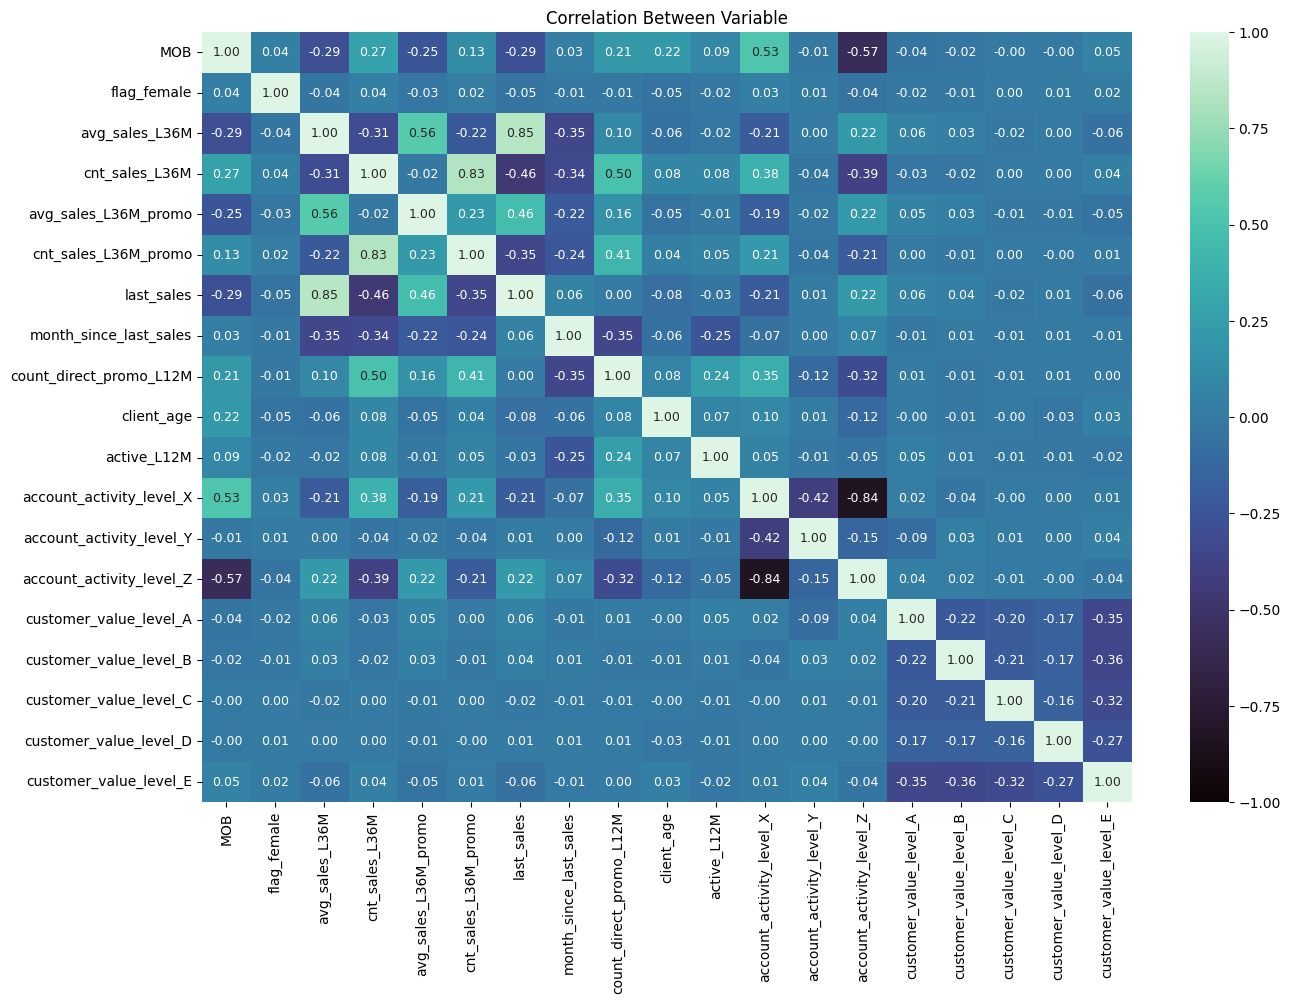

In [105]:
#Multicollinearity Check
plt.subplots(figsize=(15,10))

plt.title('Correlation Between Variable')

sns.heatmap(x_training.corr(),
            vmin=-1,
            vmax=1,
            cmap='mako',
            annot=True,
            annot_kws={"fontsize":9},
            fmt=",.2f"
            );

We will remove the variable that have higher and lower correlation value (-0.5 < x < 0.5 ).
In this case, we will remove `account_activity_level_Z` (since this is the lower level too), `avg_sales_L36M`(because have 2 correlation with other variable that doesn't meet the criteria), same case for `cnt_sales_L36M`.

*The correlation of `MOB` and `account_activity_level_X` also have 0.53 correlation value, but I think this two variable is important in business side, also the value not too high from our threshold so we keep these variables.*

In [106]:
remove_variables_high_features = ['account_activity_level_Z', 'avg_sales_L36M', 'cnt_sales_L36M']

In [107]:
# drop the high features variable column
x_training_model = x_training.drop(columns=remove_variables_high_features)
x_test_model = x_test.drop(columns=remove_variables_high_features)

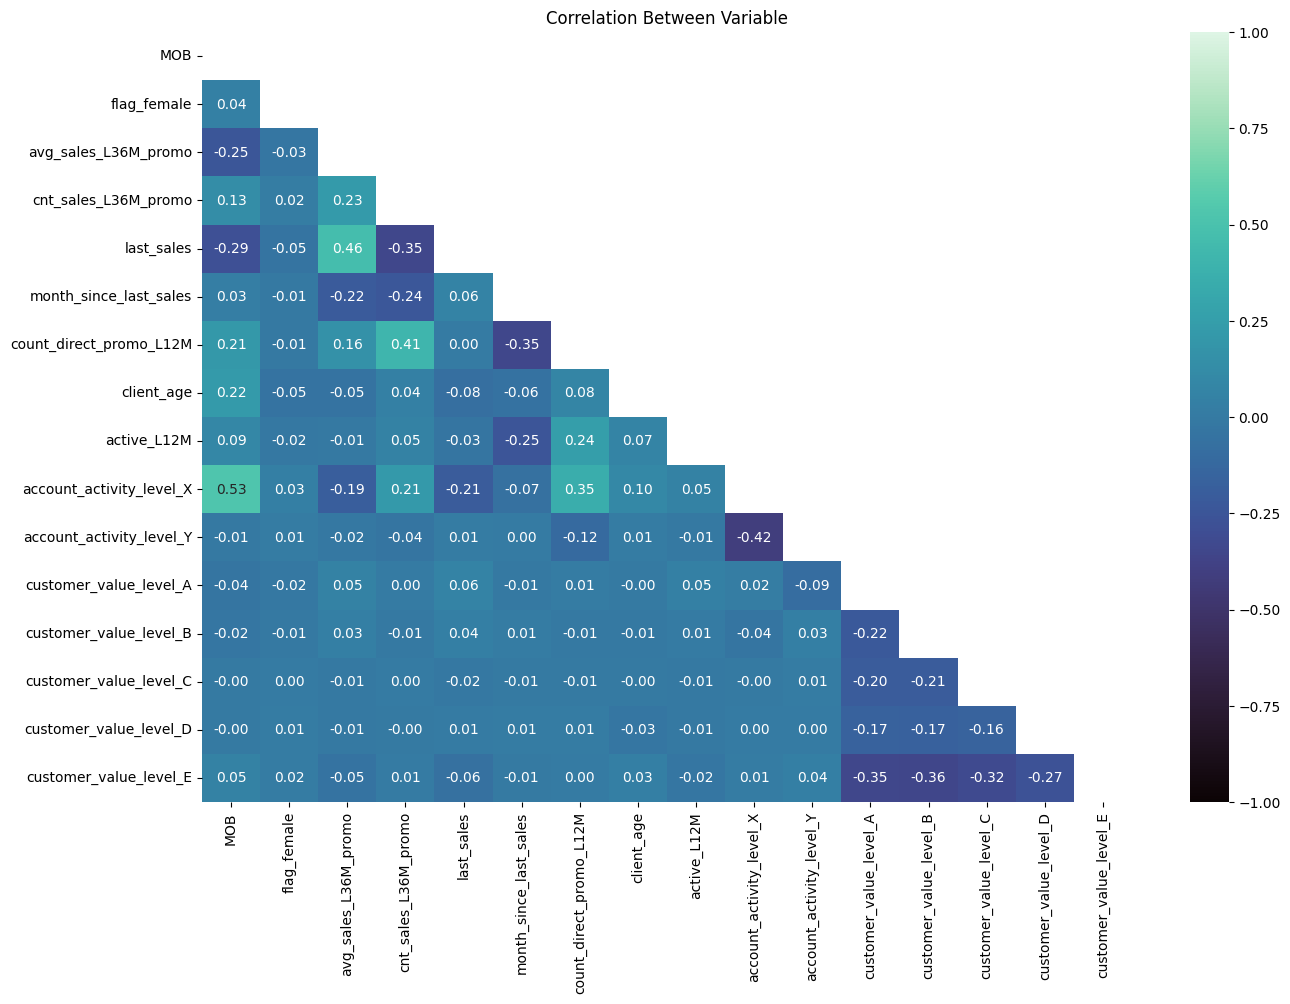

In [108]:
#Recheck the correlation after dropped
plt.subplots(figsize=(15,10))

plt.title('Correlation Between Variable')

mask = np.triu(np.ones_like(
    x_training_model.corr(), dtype=bool))

sns.heatmap(x_training_model.corr(),
            vmin=-1,
            vmax=1,
            cmap='mako',
            annot=True,
            mask=mask,
            annot_kws={"fontsize":10},
            fmt=",.2f"
            );

In [109]:
x_training_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11539 entries, 100441448 to 101015722
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MOB                       11539 non-null  int64  
 1   flag_female               11539 non-null  int64  
 2   avg_sales_L36M_promo      11539 non-null  float64
 3   cnt_sales_L36M_promo      11539 non-null  int64  
 4   last_sales                11539 non-null  float64
 5   month_since_last_sales    11539 non-null  int64  
 6   count_direct_promo_L12M   11539 non-null  int64  
 7   client_age                11539 non-null  int64  
 8   active_L12M               11539 non-null  int64  
 9   account_activity_level_X  11539 non-null  int64  
 10  account_activity_level_Y  11539 non-null  int64  
 11  customer_value_level_A    11539 non-null  int64  
 12  customer_value_level_B    11539 non-null  int64  
 13  customer_value_level_C    11539 non-null  int64  
 14 

### VIF Check

for validation only, higher VIF, higher multicollinearity of variables.

In [110]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = x_training.columns

vif_data["VIF"] = [variance_inflation_factor(x_training.values, i) for i in range(len(x_training.columns))]

vif_data.sort_values(by='VIF', ascending=False)

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
16,customer_value_level_C,inf
17,customer_value_level_D,inf
18,customer_value_level_E,inf
14,customer_value_level_A,inf
13,account_activity_level_Z,inf
12,account_activity_level_Y,inf
15,customer_value_level_B,inf
11,account_activity_level_X,inf
2,avg_sales_L36M,9.637788
6,last_sales,7.932887


*we can see that our dropped variable have high-medium value of VIF. valid.*

# Training Logistic Regression Model

In [111]:
model = LogisticRegression(
    solver='liblinear',
    penalty='l2',
    C=10,
    class_weight='balanced',
    max_iter=1000
)
model.fit(x_training_model, y_training)

LogisticRegression(C=10, class_weight='balanced', max_iter=1000,
                   solver='liblinear')

In [112]:
y_training.unique()

array([0, 1])

# Probability & Prediction Model

In [113]:
# First, predict in our training dataset
x_training_model

,MOB,flag_female,avg_sales_L36M_promo,cnt_sales_L36M_promo,last_sales,month_since_last_sales,count_direct_promo_L12M,client_age,active_L12M,account_activity_level_X,account_activity_level_Y,customer_value_level_A,customer_value_level_B,customer_value_level_C,customer_value_level_D,customer_value_level_E
account_id,,,,,,,,,,,,,,,,
100441448,13,1,0.0,0,15000.0,16,4,51,0,0,0,0,0,0,0,1
100353315,64,0,5000.0,6,5000.0,16,6,70,0,1,0,0,0,0,0,1
100334972,26,1,10000.0,1,20000.0,20,4,38,0,1,0,0,0,0,0,1
101037964,41,0,0.0,0,15000.0,20,5,70,0,1,0,0,0,0,0,1
100287649,14,1,15000.0,1,15000.0,17,4,67,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100723155,13,1,20000.0,1,20000.0,16,5,29,0,0,0,0,0,0,0,1
100768318,35,0,0.0,0,20000.0,20,4,29,0,1,0,0,0,0,0,1
100341594,42,0,10000.0,7,10000.0,20,7,33,0,1,0,0,0,0,0,1


In [114]:
model.classes_

array([0, 1])

In [115]:
model.predict_proba(x_training_model)

# from this result, if probability in the right column (target = 1) > 0.5: label = 1

array([[0.88349756, 0.11650244],
       [0.13681643, 0.86318357],
       [0.85631664, 0.14368336],
       ...,
       [0.22058646, 0.77941354],
       [0.40546625, 0.59453375],
       [0.45777941, 0.54222059]])

In [116]:
#if prob > 0.5, then it will be labeled 1. Otherwise, 0
model.predict(x_training_model)

array([0, 1, 0, ..., 1, 1, 1])

## Predicting Training Data

In [117]:
#Predict the training data
x_training_result = x_training_model.copy()
x_training_result['prediction'] = model.predict(x_training_model)
x_training_result[['prob_no', 'prob_takers']] = model.predict_proba(x_training_model)
x_training_result[['prob_takers', 'prediction']]

,prob_takers,prediction
account_id,,
100441448,0.116502,0
100353315,0.863184,1
100334972,0.143683,0
101037964,0.238793,0
100287649,0.268160,0
...,...,...
100723155,0.081542,0
100768318,0.134005,0
100341594,0.779414,1


## Predicting Testing Data

In [118]:
#Predict the testing data
x_test_result = x_test_model.copy()
x_test_result['prediction'] = model.predict(x_test_model)
x_test_result[['prob_no', 'prob_takers']] = model.predict_proba(x_test_model)
x_test_result[['prob_takers', 'prediction']]

,prob_takers,prediction
account_id,,
100105475,0.951698,1
100161454,0.116957,0
101046959,0.438887,0
100421475,0.430064,0
100107248,0.393082,0
...,...,...
100657173,0.613090,1
100396038,0.363280,0
100125421,0.152679,0


# Model Evaluation

### Metrics Evaluation

In [119]:
#Training and Testing Evaluation Differences
def evaluate_model(y_true, y_pred, y_prob, dataset_name="Test"):
    return {
        "Dataset": dataset_name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1 Score": f1_score(y_true, y_pred),
        "AUC": roc_auc_score(y_true, y_prob)
    }

#Training data evaluation
train_eval = evaluate_model(
    y_true = y_training,
    y_pred = x_training_result['prediction'],
    y_prob = x_training_result['prob_takers'],
    dataset_name="Training"
)

#Testing data evaluation
test_eval = evaluate_model(
    y_true = y_test,
    y_pred = x_test_result['prediction'],
    y_prob = x_test_result['prob_takers'],
    dataset_name="Test"
)

eval_df = pd.DataFrame([train_eval, test_eval])
print(eval_df)


    Dataset  Accuracy  Precision    Recall  F1 Score       AUC
0  Training  0.742265   0.383514  0.765517  0.511016  0.821639
1      Test  0.747675   0.394026  0.780432  0.523664  0.830098


### Confusion Matrix

=== Training Data Evaluation ===

Classification Report (Training):
              precision    recall  f1-score   support

           0       0.94      0.74      0.83      9509
           1       0.38      0.77      0.51      2030

    accuracy                           0.74     11539
   macro avg       0.66      0.75      0.67     11539
weighted avg       0.84      0.74      0.77     11539



[[7011 2498]
 [ 476 1554]]


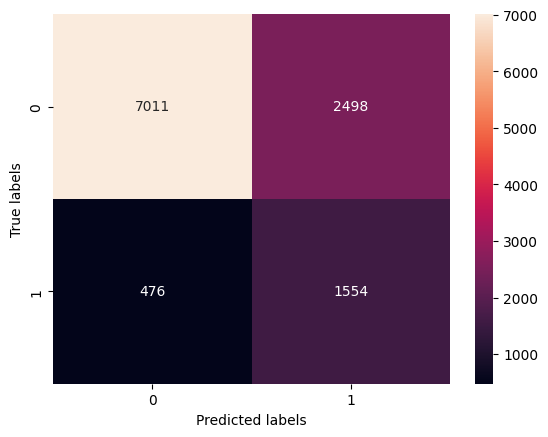


=== Testing Data Evaluation ===

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.94      0.74      0.83      4067
           1       0.39      0.78      0.52       879

    accuracy                           0.75      4946
   macro avg       0.67      0.76      0.68      4946
weighted avg       0.84      0.75      0.77      4946



[[3012 1055]
 [ 193  686]]


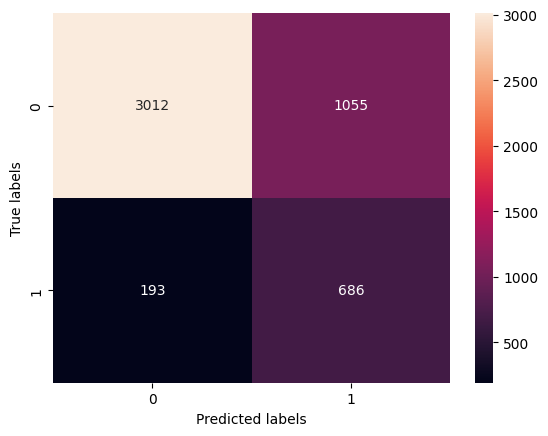

In [120]:
# Classification report & confusion matrix data Training
print("=== Training Data Evaluation ===")
print("\nClassification Report (Training):")
print(classification_report(y_training, x_training_result['prediction']))
print('\n')
confusion_train = confusion_matrix(y_training, x_training_result['prediction'])
print(confusion_train)
sns.heatmap(confusion_train, annot=True, fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# Classification report & confusion matrix data Testing
print("\n=== Testing Data Evaluation ===")
print("\nClassification Report (Test):")
print(classification_report(y_test, x_test_result['prediction']))
print('\n')
confusion_test = confusion_matrix(y_test, x_test_result['prediction'])
print(confusion_test)
sns.heatmap(confusion_test, annot=True, fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

### ROC - AUC

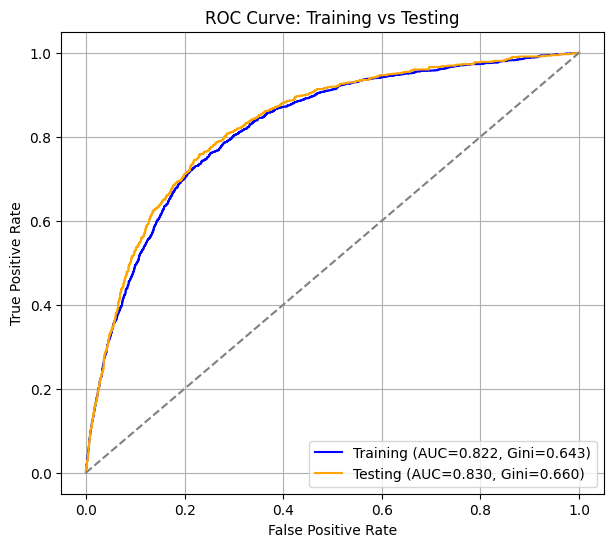

In [121]:
#ROC Curve Plot
#Training
fpr_train, tpr_train, _ = roc_curve(y_training, x_training_result['prob_takers'])
auc_train = roc_auc_score(y_training, x_training_result['prob_takers'])
gini_train = 2 * auc_train - 1

#Testing
fpr_test, tpr_test, _ = roc_curve(y_test, x_test_result['prob_takers'])
auc_test = roc_auc_score(y_test, x_test_result['prob_takers'])
gini_test = 2 * auc_test - 1

# Plot
plt.figure(figsize=(7,6))
plt.plot(fpr_train, tpr_train, color='blue',
         label=f"Training (AUC={auc_train:.3f}, Gini={gini_train:.3f})")
plt.plot(fpr_test, tpr_test, color='orange',
         label=f"Testing (AUC={auc_test:.3f}, Gini={gini_test:.3f})")

# Baseline
plt.plot([0,1],[0,1],'--', color='gray')

# Labels
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve: Training vs Testing")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


# Feature Importance

In [122]:
from sklearn.preprocessing import MinMaxScaler

ss_scaler = MinMaxScaler()
x_scaled = ss_scaler.fit_transform(x_training_model)
x_training_scaled = pd.DataFrame(x_scaled, columns=x_training_model.columns)

model_scaled = LogisticRegression(
    solver='liblinear',
    penalty='l2',
    C=10,
    class_weight='balanced',
    max_iter=1000
)
model_scaled.fit(x_training_scaled, y_training)

LogisticRegression(C=10, class_weight='balanced', max_iter=1000,
                   solver='liblinear')

<Axes: title={'center': 'Predictor Strength each Column'}, ylabel='Feature'>

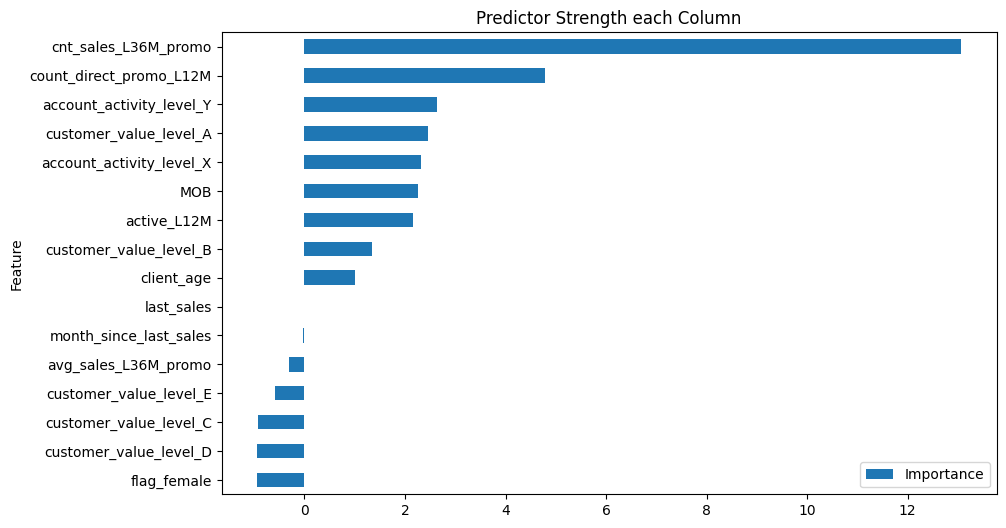

In [123]:
# Get coefficient https://christophm.github.io/interpretable-ml-book/logistic.html
coefficients = model_scaled.coef_[0]
coefficients = np.sign(coefficients) * np.exp(coefficients)

feature_importance = pd.DataFrame({'Feature': x_training_model.columns, 'Importance': coefficients})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(kind='barh', x='Feature', y='Importance', title="Predictor Strength each Column", figsize=(10, 6))

*Our new variable `active_L12M` has high importance for classification. Similarly, `MOB` and `account_activity_level_X`, which we previously considered leaving out, are also important.*

# Adoption Rate & Campaign Effectiveness (Lift)

In [124]:
#baseline adoption rate
baseline_train = y_training.mean()
baseline_test = y_test.mean()

# Adoption rate = precision (TP / (TP + FP))
precision_train = eval_df.loc[eval_df['Dataset']=="Training", "Precision"].values[0]
precision_test = eval_df.loc[eval_df['Dataset']=="Test", "Precision"].values[0]

#Lift Calculation
lift_train = precision_train / baseline_train
lift_test = precision_test / baseline_test

lift_df = pd.DataFrame({
    "Dataset": ["Training", "Test"],
    "Baseline Adoption Rate": [baseline_train, baseline_test],
    "Precision (Adoption Rate)": [precision_train, precision_test],
    "Lift": [lift_train, lift_test]
})

print(lift_df)


    Dataset  Baseline Adoption Rate  Precision (Adoption Rate)      Lift
0  Training                0.175925                   0.383514  2.179986
1      Test                0.177719                   0.394026  2.217127


# Decile Performance

In [125]:
#In testing set
def decile_analysis(y_true, y_prob, n_deciles=10):
    df = pd.DataFrame({"y_true": y_true, "y_prob": y_prob})
    df = df.sort_values("y_prob", ascending=False).reset_index(drop=True)

    # Assign decile (1 = top 10%)
    df["decile"] = pd.qcut(df.index, q=n_deciles, labels=False) + 1

    # calculate baseline adoption rate
    baseline_rate = df["y_true"].mean()

    #Decile aggregate
    summary = df.groupby("decile").agg(
        total_cust=("y_true", "count"),
        adopters=("y_true", "sum")
    ).reset_index()

    summary["adoption_rate"] = summary["adopters"] / summary["total_cust"]
    summary["lift"] = summary["adoption_rate"] / baseline_rate

    # Capture rate (cumulative)
    summary["cum_adopters"] = summary["adopters"].cumsum()
    summary["cum_capture_rate"] = summary["cum_adopters"] / summary["adopters"].sum()

    return summary

decile_result = decile_analysis(
    y_true = y_test,
    y_prob = x_test_result['prob_takers']
)

decile_result

,decile,total_cust,adopters,adoption_rate,lift,cum_adopters,cum_capture_rate
0,1,495,293,0.591919,3.330640,293,0.333333
1,2,495,210,0.424242,2.387148,503,0.572241
2,3,494,129,0.261134,1.469359,632,0.718999
3,4,495,89,0.179798,1.011696,721,0.820250
4,5,494,58,0.117409,0.660642,779,0.886234
5,6,495,37,0.074747,0.420593,816,0.928328
6,7,494,22,0.044534,0.250588,838,0.953356
7,8,495,17,0.034343,0.193245,855,0.972696
8,9,494,16,0.032389,0.182246,871,0.990899
9,10,495,8,0.016162,0.090939,879,1.000000


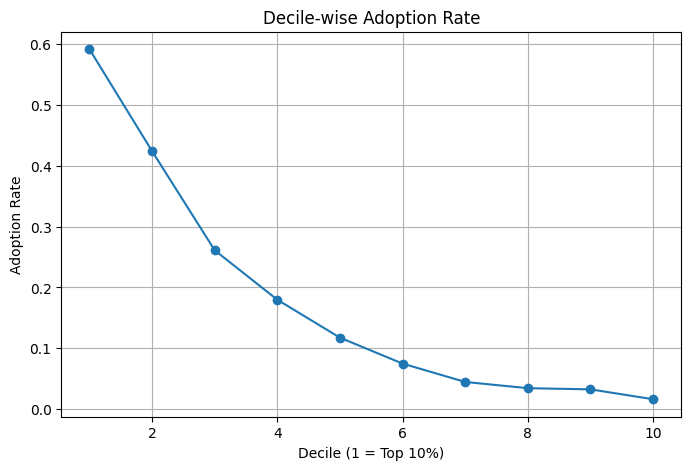

In [126]:
#Plot Adoption Rate per Decile
plt.figure(figsize=(8,5))
plt.plot(decile_result["decile"], decile_result["adoption_rate"], marker="o")
plt.xlabel("Decile (1 = Top 10%)")
plt.ylabel("Adoption Rate")
plt.title("Decile-wise Adoption Rate")
plt.grid(True)
plt.show()

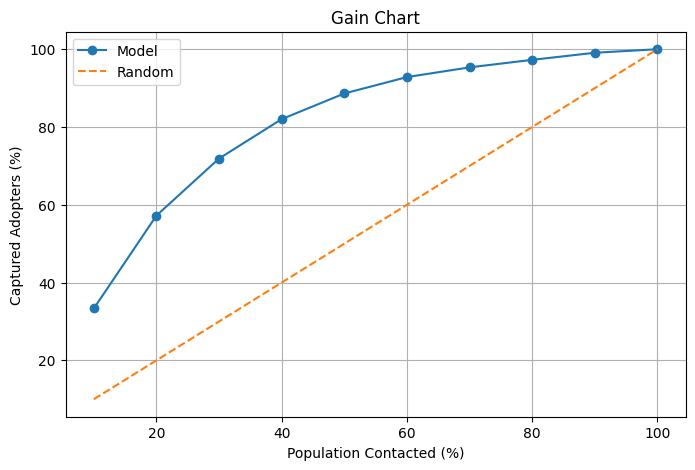

In [127]:
# Gain chart (cumulative capture rate vs % populasi)
plt.figure(figsize=(8,5))

population_perc = (decile_result["decile"] / decile_result["decile"].max()) * 100


plt.plot(population_perc, decile_result["cum_capture_rate"] * 100, marker="o", label="Model")
plt.plot(population_perc, population_perc, linestyle="--", label="Random")  # baseline random

plt.xlabel("Population Contacted (%)")
plt.ylabel("Captured Adopters (%)")
plt.title("Gain Chart")
plt.legend()
plt.grid(True)
plt.show()


# Top 1000 Lead Selection (Business Impact)

In [131]:
##Business Impact (Top 1000 Customers)

def top_n_analysis(y_true, y_prob, top_n=1000, as_percentage=True):
    df = pd.DataFrame({
        "y_true": y_true,
        "y_prob": y_prob
    })

    df = df.sort_values("y_prob", ascending=False).reset_index(drop=True)
    top_df = df.head(top_n)

    baseline_rate = df["y_true"].mean()
    top_total = len(top_df)
    top_adopters = top_df["y_true"].sum()
    top_adoption_rate = top_adopters / top_total
    lift = top_adoption_rate / baseline_rate if baseline_rate != 0 else float('inf')
    capture_rate = top_adopters / df["y_true"].sum() if df["y_true"].sum() != 0 else float('nan')

    if as_percentage:
        summary = {
            "top_n": int(top_n),
            "total_cust": int(top_total),
            "adopters": int(top_adopters),
            "adoption_rate": float(round(top_adoption_rate*100, 2)),
            "baseline_rate": float(round(baseline_rate*100, 2)),
            "lift": float(round(lift, 2)),
            "capture_rate": float(round(capture_rate*100, 2))
        }
    else:
        summary = {
            "top_n": int(top_n),
            "total_cust": int(top_total),
            "adopters": int(top_adopters),
            "adoption_rate": float(top_adoption_rate),
            "baseline_rate": float(baseline_rate),
            "lift": float(lift),
            "capture_rate": float(capture_rate)
        }

    return summary, top_df

top1000_summary, top1000_customers = top_n_analysis(
    y_true=y_test,
    y_prob=x_test_result['prob_takers'],
    top_n=1000
)

top1000_summary


{'top_n': 1000,
 'total_cust': 1000,
 'adopters': 509,
 'adoption_rate': 50.9,
 'baseline_rate': 17.77,
 'lift': 2.86,
 'capture_rate': 57.91}

*  Of these 1,000, 509 were actual adopters, resulting in a top 1,000 adoption rate of 50.9%.

*  The baseline rate (all customers) was 17.77%, meaning that on average, only 18 out of 100 customers would convert.

* Lift = 2.86 → the model successfully targeted a group that is more than 2.8x more potential than the average.

* Capture rate = 57.91% → of all adopters, approximately 58% are included in the top 1000 predicted by the model.